In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, models
import tensorflow as tf

In [ ]:
# filename = "Dataset/file_gop_test(ver1).csv"
filename = "Dataset/filtered_new_data(Hiep).csv"
df = pd.read_csv(filename,encoding='latin1')

print("Number of rows:",len(df))
print(df.head())

Number of rows: 19253
   Temperature (°C)  Humidity (%)  Pressure (hPa)  Voltage (V)  Fire Alarm
0            20.391         49.37         939.771     0.064874           0
1            20.406         49.58         939.770     0.084932           0
2            20.420         50.11         939.775     0.035523           0
3            20.434         50.68         939.772     0.025470           0
4            20.448         51.23         939.772     0.009035           0


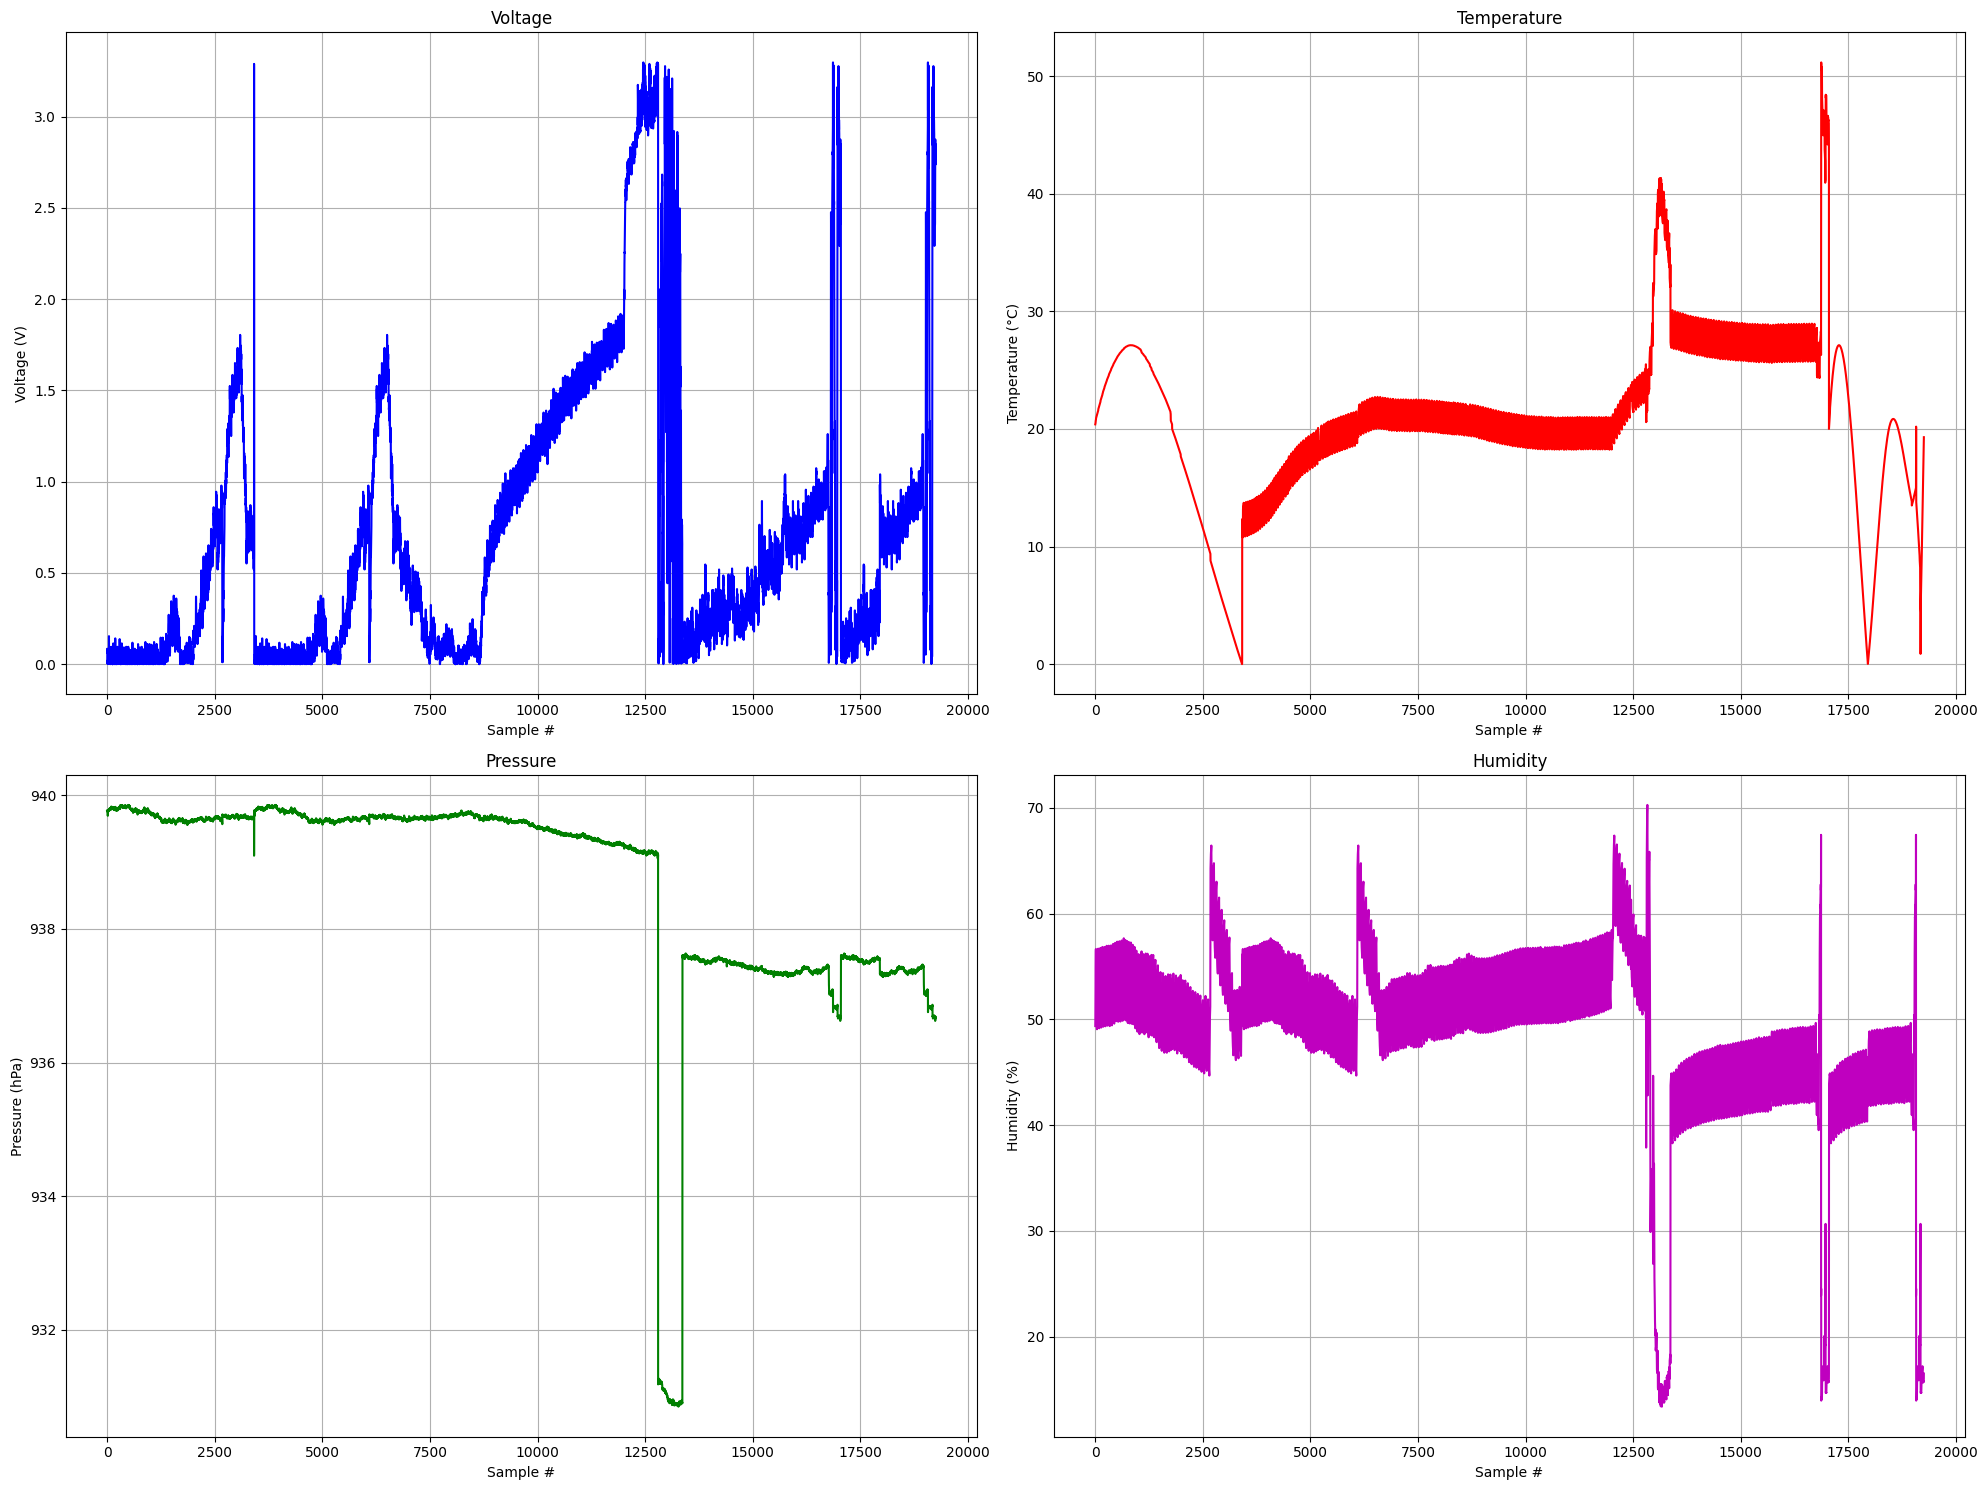

In [103]:
CO_value=df['Voltage (V)'].values
Temper_value=df['Temperature (°C)'].values
Pres_value=df['Pressure (hPa)'].values
Humid_value=df['Humidity (%)'].values

index=range(1,len(df)+1)

plt.figure(5, figsize=(20, 15))

plt.subplot(2, 2, 1)
plt.plot(index, CO_value, 'b-')
plt.title("Voltage")
plt.xlabel("Sample #")
plt.ylabel("Voltage (V)")
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(index, Temper_value, 'r-')
plt.title("Temperature")
plt.xlabel("Sample #")
plt.ylabel("Temperature (°C)")
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(index, Pres_value, 'g-')
plt.title("Pressure")
plt.xlabel("Sample #")
plt.ylabel("Pressure (hPa)")
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(index, Humid_value, 'm-')
plt.title("Humidity")
plt.xlabel("Sample #")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.tight_layout()
plt.show()

In [104]:
# NGƯỠNG CẢM BIẾN ĐO ĐƯỢC THEO NHÀ SẢN XUẤT.
VOLTAGE_MIN, VOLTAGE_MAX = 0.0, 3.3
TEMP_MIN, TEMP_MAX = 0.0, 85.0
PRESSURE_MIN, PRESSURE_MAX = 300.0, 1100.0
HUMIDITY_MIN, HUMIDITY_MAX =15.0, 95.0
# CHUAN HOA DU LIEU 
# Normalize the input data , between 0 to 1
for column in df.columns:
    min_val = df[column].min()
    max_val = df[column].max()  
    print(f"Cột '{column}': min = {min_val}, max = {max_val}")

Cột 'Temperature (°C)': min = 0.0, max = 51.17
Cột 'Humidity (%)': min = 13.39, max = 70.28
Cột 'Pressure (hPa)': min = 930.852, max = 939.856
Cột 'Voltage (V)': min = 0.0004, max = 3.297708
Cột 'Fire Alarm': min = 0, max = 1


In [ ]:
features=df[['Voltage (V)','Temperature (°C)','Pressure (hPa)','Humidity (%)']]
labels=df['Fire Alarm']
# CHUẨN HÓA
def normalize_column(col, col_min, col_max):
    return (col - col_min) / (col_max - col_min)

# Áp dụng chuẩn hóa
features_scaled = pd.DataFrame({
    'Voltage (V)': normalize_column(features['Voltage (V)'], VOLTAGE_MIN, VOLTAGE_MAX),
    'Temperature (°C)': normalize_column(features['Temperature (°C)'], TEMP_MIN, TEMP_MAX),
    'Pressure (hPa)': normalize_column(features['Pressure (hPa)'], PRESSURE_MIN, PRESSURE_MAX),
    'Humidity (%)': normalize_column(features['Humidity (%)'], HUMIDITY_MIN, HUMIDITY_MAX)
})
print(features)
print('------------------')
print(features_scaled)

       Voltage (V)  Temperature (°C)  Pressure (hPa)  Humidity (%)
0         0.064874            20.391         939.771         49.37
1         0.084932            20.406         939.770         49.58
2         0.035523            20.420         939.775         50.11
3         0.025470            20.434         939.772         50.68
4         0.009035            20.448         939.772         51.23
...            ...               ...             ...           ...
19248     2.777778            18.438         936.670         15.79
19249     2.738788            18.653         936.678         15.87
19250     2.783693            18.867         936.687         15.84
19251     2.815833            19.083         936.680         16.04
19252     2.830226            19.299         936.676         16.52

[19253 rows x 4 columns]
------------------
       Voltage (V)  Temperature (°C)  Pressure (hPa)  Humidity (%)
0         0.019659          0.239894        0.799714      0.429625
1         0.02573

In [111]:
# 3. Create time windows for sequence modeling
def create_windows(data, labels, window_size=60):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(labels[i + window_size])
    return np.array(X), np.array(y)

window_size = 60
X, y = create_windows(features_scaled, labels.values, window_size)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = models.Sequential([
    layers.Input(shape=(window_size,4)),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.GlobalAveragePooling1D(),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# model = models.Sequential([
#     layers.Input(shape=(window_size, 4)),
#     layers.Conv1D(128, kernel_size=3, activation='relu', padding='same'),
#     layers.Conv1D(64, kernel_size=3, activation='relu', padding='same'),
#     layers.Conv1D(32, kernel_size=3, activation='relu', padding='same'),
#     layers.GlobalAveragePooling1D(),
#     layers.Dense(32, activation='relu'),
#     layers.Dropout(0.3),  # Thêm Dropout để giảm overfitting
#     layers.Dense(16, activation='relu'),
#     layers.Dense(1, activation='sigmoid')
# ])
# 6. Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 7. Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6941 - loss: 0.5712 - val_accuracy: 0.8649 - val_loss: 0.3574
Epoch 2/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8512 - loss: 0.3720 - val_accuracy: 0.8815 - val_loss: 0.2737
Epoch 3/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8724 - loss: 0.2931 - val_accuracy: 0.9095 - val_loss: 0.2376
Epoch 4/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8779 - loss: 0.2709 - val_accuracy: 0.8893 - val_loss: 0.2302
Epoch 5/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8865 - loss: 0.2530 - val_accuracy: 0.9241 - val_loss: 0.1895
Epoch 6/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9059 - loss: 0.2165 - val_accuracy: 0.9427 - val_loss: 0.1685
Epoch 7/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9230 - loss: 0.1824 - val_accuracy: 0.9626 - val_loss: 0.1307
Epoch 8/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9284 - loss: 0.1687 - val_accu

In [123]:
y_pred = (model.predict(X_test)).astype(int)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[2211    0]
 [ 655  973]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      2211
           1       1.00      0.60      0.75      1628

    accuracy                           0.83      3839
   macro avg       0.89      0.80      0.81      3839
weighted avg       0.87      0.83      0.82      3839



In [124]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9967 - loss: 0.0210
Test Loss: 0.015441368333995342, Test Accuracy: 0.998176634311676


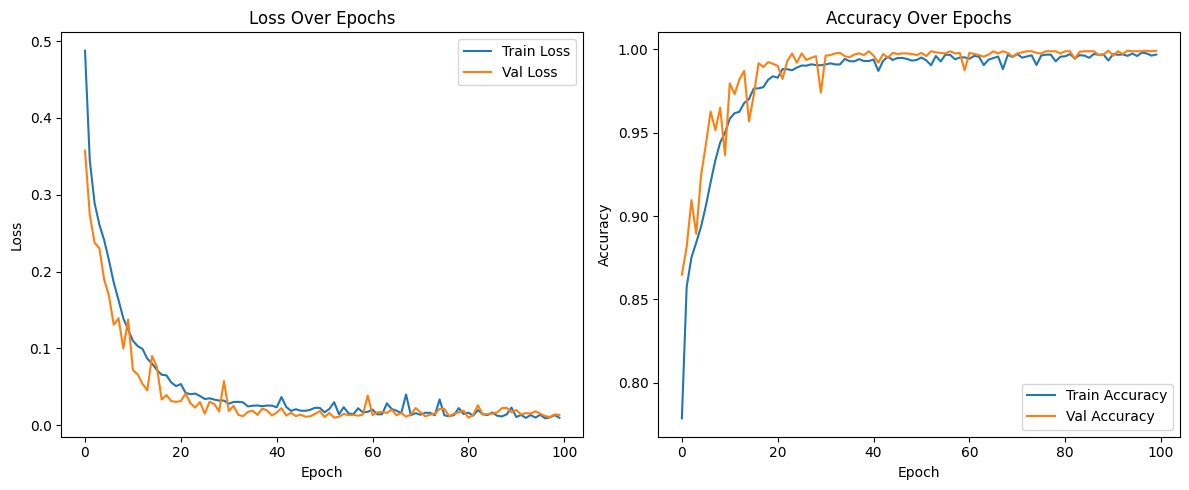

In [125]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [126]:
model.save('conv1d_model.h5')

In [127]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\Bao\AppData\Local\Temp\tmp0_swhys4\assets


INFO:tensorflow:Assets written to: C:\Users\Bao\AppData\Local\Temp\tmp0_swhys4\assets


Saved artifact at 'C:\Users\Bao\AppData\Local\Temp\tmp0_swhys4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 60, 4), dtype=tf.float32, name='keras_tensor_48')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2767434801104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2767434793616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2767434800336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2767434808208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2767434803024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2767434807440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2767391980816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2767391974864: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [128]:
with open('conv1d_model.tflite', 'wb') as f:
    f.write(tflite_model)

In [132]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):

  c_str = ''

  # Create header guard
  c_str += '#ifndef ' + var_name.upper() + '_H\n'
  c_str += '#define ' + var_name.upper() + '_H\n\n'

  # Add array length at top of file
  c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  # Declare C variable
  c_str += 'unsigned char ' + var_name + '[] = {'
  hex_array = []
  for i, val in enumerate(hex_data) :

    # Construct string from hex
    hex_str = format(val, '#04x')

    # Add formatting so each line stays within 80 characters
    if (i + 1) < len(hex_data):
      hex_str += ','
    if (i + 1) % 12 == 0:
      hex_str += '\n '
    hex_array.append(hex_str)

  # Add closing brace
  c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

  # Close out header guard
  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str

# Write TFLite model to a C source (or header) file
c_model_name = 'conv1d_model'
with open(c_model_name + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, c_model_name))

## SO SÁNH MÔ HÌNH GỐC và TFLITE

In [42]:
import numpy as np
import pandas as pd
import tensorflow as tf
import time
import random
import os
from sklearn.metrics import accuracy_score
from tabulate import tabulate

# === 1. Load dữ liệu và xử lý ===
df = pd.read_csv("Dataset/filtered_new_data(Hiep).csv", encoding='latin1')

# Tách features và labels
features = df[['Voltage (V)', 'Temperature (°C)', 'Pressure (hPa)', 'Humidity (%)']]
labels = df['Fire Alarm']

X = features.values.astype(np.float32)
y = labels.values.astype(np.int32)

# === 2. Lấy một đoạn 60 bước liên tiếp làm input ===
start_idx = random.randint(0, len(X) - 61)
input_data = X[start_idx:start_idx+60].reshape((1, 60, 4))  # shape (1, 60, 4)
true_label = int(np.round(np.mean(y[start_idx:start_idx+60])))  # Gán nhãn trung bình của đoạn

# === 3. Load mô hình TensorFlow ===
tf_model_path = "conv1d_model.h5"
model = tf.keras.models.load_model(tf_model_path)

# Dự đoán với TensorFlow
start_tf = time.time()
pred_tf = model.predict(input_data)
tf_infer_time = time.time() - start_tf
pred_tf_class = int(pred_tf[0][0] > 0.5)
tf_acc = int(pred_tf_class == true_label)

# Tính tốc độ suy luận (samples/s)
tf_infer_speed = 1 / tf_infer_time if tf_infer_time > 0 else 0

# === 4. Load mô hình TFLite ===
tflite_model_path = "conv1d_model.tflite"
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Dự đoán với TFLite
start_tflite = time.time()
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()
output = interpreter.get_tensor(output_details[0]['index'])
tflite_infer_time = time.time() - start_tflite
pred_tflite_class = int(output[0][0] > 0.5)
tflite_acc = int(pred_tflite_class == true_label)

# Tính tốc độ suy luận (samples/s)
tflite_infer_speed = 1 / tflite_infer_time if tflite_infer_time > 0 else 0

# === 5. So sánh kích thước mô hình ===
tf_size = os.path.getsize(tf_model_path) / 1024  # KB
tflite_size = os.path.getsize(tflite_model_path) / 1024  # KB

# === 6. In bảng kết quả ===
headers = ["Mô hình", "Đoán đúng?", "Inference Time (s)", "Inference Speed (samples/s)", "Model Size (KB)", "Accuracy"]
table = [
    [ tf_model_path, "✅" if tf_acc else "❌", f"{tf_infer_time:.4f}", f"{tf_infer_speed:.2f}", f"{tf_size:.2f}", f"{tf_acc:.4f}"],
    [ tflite_model_path, "✅" if tflite_acc else "❌", f"{tflite_infer_time:.4f}", f"{tflite_infer_speed:.2f}", f"{tflite_size:.2f}", f"{tflite_acc:.4f}"]
]

print(tabulate(table, headers=headers, tablefmt="grid"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
+---------------------+--------------+----------------------+-------------------------------+-------------------+------------+
| Mô hình             | Đoán đúng?   |   Inference Time (s) |   Inference Speed (samples/s) |   Model Size (KB) |   Accuracy |
+=====================+==============+======================+===============================+===================+============+
| conv1d_model.h5     | ✅           |                0.331 |                          3.02 |            126.4  |          1 |
+---------------------+--------------+----------------------+-------------------------------+-------------------+------------+
| conv1d_model.tflite | ✅           |                0.001 |                       1001.27 |             34.09 |          1 |
+---------------------+--------------+----------------------+-------------------------------+-------------------+------------+
